### Importing the libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

### Data Preprocessing

In [116]:
#!wget https://data.mendeley.com/public-files/datasets/y7pckrw6z2/files/1efa0d6b-4d7f-4f58-9584-08f0488279ee/file_downloaded
#!unzip file_downloaded

In [117]:
dim = (64, 64, 1)
target_size = dim[:2]
batch_size = 64

In [118]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

In [119]:
dataSet = datagen.flow_from_directory('ArASL_Database_54K_Final',                             
                                      target_size = target_size,
                                      batch_size = 54049,
                                      class_mode='categorical',
                                      shuffle=False)

Found 54049 images belonging to 32 classes.


In [120]:
dataSet.image_shape

(64, 64, 3)

In [121]:
indices = dataSet.class_indices
indices

{'ain': 0,
 'al': 1,
 'aleff': 2,
 'bb': 3,
 'dal': 4,
 'dha': 5,
 'dhad': 6,
 'fa': 7,
 'gaaf': 8,
 'ghain': 9,
 'ha': 10,
 'haa': 11,
 'jeem': 12,
 'kaaf': 13,
 'khaa': 14,
 'la': 15,
 'laam': 16,
 'meem': 17,
 'nun': 18,
 'ra': 19,
 'saad': 20,
 'seen': 21,
 'sheen': 22,
 'ta': 23,
 'taa': 24,
 'thaa': 25,
 'thal': 26,
 'toot': 27,
 'waw': 28,
 'ya': 29,
 'yaa': 30,
 'zay': 31}

In [122]:
encoding = {v: k for k, v in indices.items()}
encoding

{0: 'ain',
 1: 'al',
 2: 'aleff',
 3: 'bb',
 4: 'dal',
 5: 'dha',
 6: 'dhad',
 7: 'fa',
 8: 'gaaf',
 9: 'ghain',
 10: 'ha',
 11: 'haa',
 12: 'jeem',
 13: 'kaaf',
 14: 'khaa',
 15: 'la',
 16: 'laam',
 17: 'meem',
 18: 'nun',
 19: 'ra',
 20: 'saad',
 21: 'seen',
 22: 'sheen',
 23: 'ta',
 24: 'taa',
 25: 'thaa',
 26: 'thal',
 27: 'toot',
 28: 'waw',
 29: 'ya',
 30: 'yaa',
 31: 'zay'}

In [123]:
X, y = dataSet.next()

In [124]:
import cv2

X = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X])
X = np.expand_dims(X, axis=-1)

In [125]:
X.shape

(54049, 64, 64, 1)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Displaying basic information

In [127]:
print('Image Size (Pixels):', target_size)
print('Training set:', X_train.shape[0], 'images')
print('Test set:', X_test.shape[0], 'images')
print('Classes:', dataSet.num_classes)

Image Size (Pixels): (64, 64)
Training set: 40536 images
Test set: 13513 images
Classes: 32


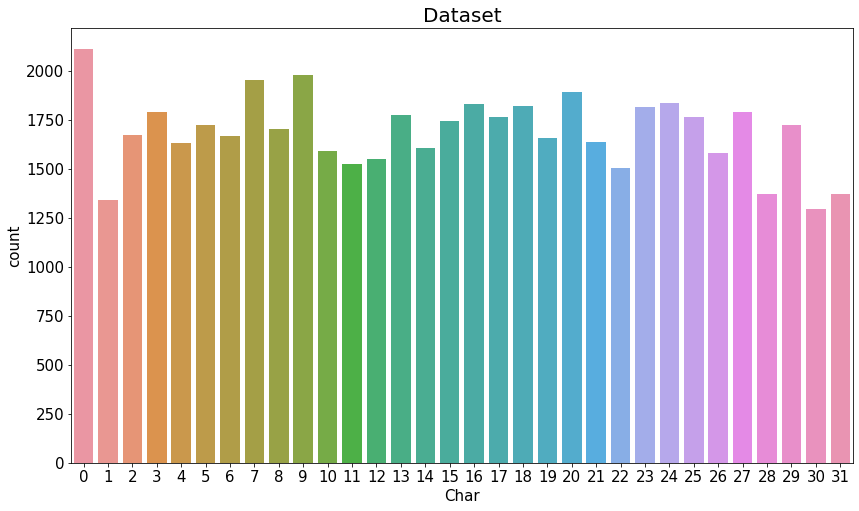

In [128]:
plt.figure(figsize=(14, 8))
font = {'weight': 'normal','size': 15}
plt.rc('font', **font)
plt.title('Dataset', size=20)
plt.xlabel('Char')
sns.countplot(x = y.argmax(axis=1))
plt.show()

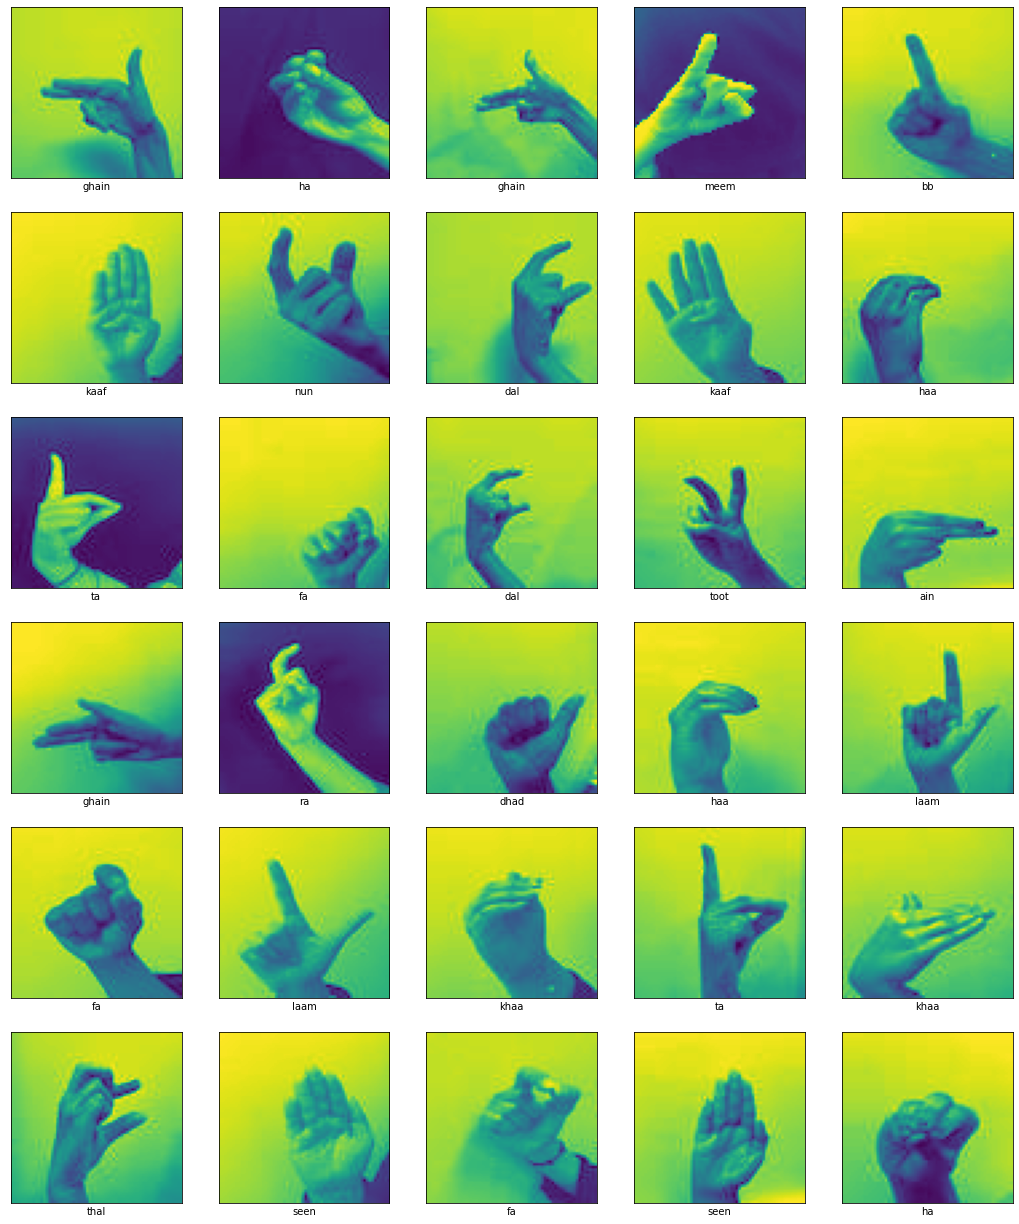

In [129]:
plt.figure(figsize=(18, 22))
font = {'size': 10}
plt.rc('font', **font)

j = 1
for i in list(range(30)):
    plt.subplot(6, 5, j)
    plt.xticks([])
    plt.yticks([])
    
    idx = y_test[i].argmax()
    plt.xlabel(encoding[idx])
    plt.imshow(X_test[i][:, :, 0])

    j += 1
plt.show()

### Building the CNN

In [158]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout

# Initialising the CNN
model = Sequential()

# Adding a convolutional layer
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=dim))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.3))

# Adding a convolutional layer
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.3))

# Adding a convolutional layer
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.3))

# Adding a convolutional layer
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Full Connection
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(dataSet.num_classes, activation='softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

In [159]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 128)     

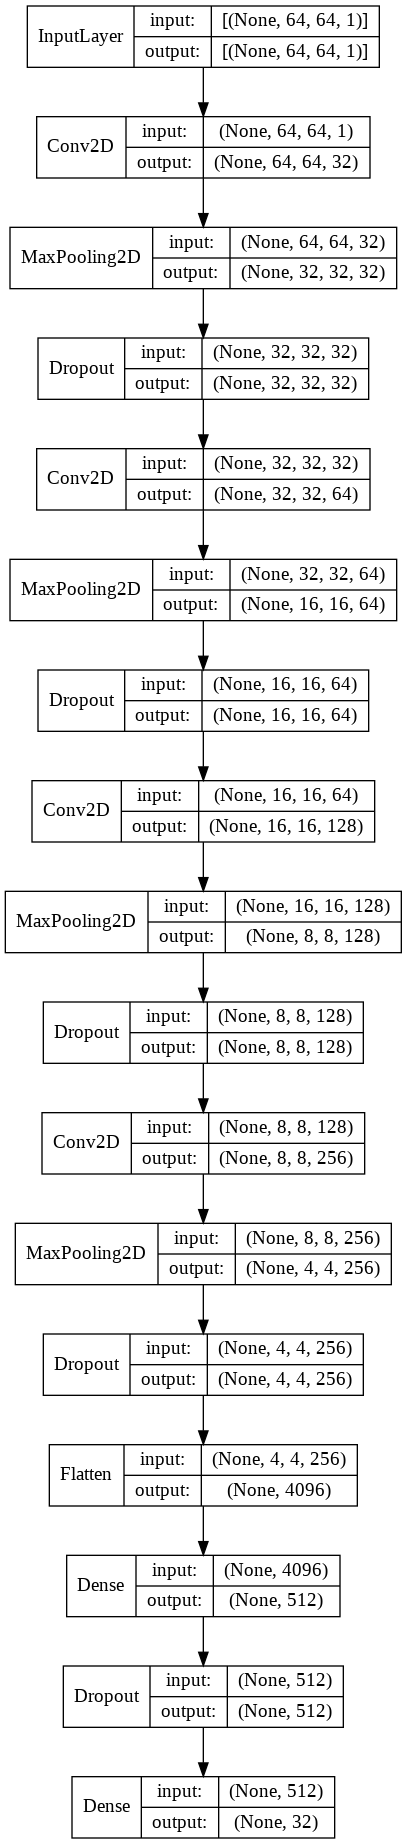

In [160]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='ArDSLModel.png', show_shapes=True, show_layer_names=False)

In [161]:
# Training the CNN

epochs = 50

history = model.fit(X_train, y_train,
                  validation_data = (X_test, y_test),
                  batch_size = batch_size,
                  epochs = epochs)

Epoch 1/50
634/634 [==============================] - 10s 14ms/step - loss: 3.0563 - accuracy: 0.1410 - val_loss: 0.6236 - val_accuracy: 0.8069
Epoch 2/50
634/634 [==============================] - 9s 14ms/step - loss: 0.7156 - accuracy: 0.7702 - val_loss: 0.2692 - val_accuracy: 0.9270
Epoch 3/50
634/634 [==============================] - 9s 14ms/step - loss: 0.4079 - accuracy: 0.8690 - val_loss: 0.1679 - val_accuracy: 0.9546
Epoch 4/50
634/634 [==============================] - 9s 14ms/step - loss: 0.2810 - accuracy: 0.9126 - val_loss: 0.1296 - val_accuracy: 0.9677
Epoch 5/50
634/634 [==============================] - 9s 14ms/step - loss: 0.2317 - accuracy: 0.9269 - val_loss: 0.1207 - val_accuracy: 0.9683
Epoch 6/50
634/634 [==============================] - 9s 14ms/step - loss: 0.1995 - accuracy: 0.9371 - val_loss: 0.1064 - val_accuracy: 0.9731
Epoch 7/50
634/634 [==============================] - 9s 14ms/step - loss: 0.1775 - accuracy: 0.9431 - val_loss: 0.0996 - val_accuracy: 0.972

### Model evaluation

In [162]:
def report(y_test, y_pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    acc = np.round(accuracy_score(y_test, y_pred) * 100, 2)
    print('Accuracy: {}%'.format(acc))

    plt.figure(figsize=(20, 16))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 13}).set_title('Confusion Matrix')
    plt.show()

In [163]:
# Predicting the Test set results

y_pred = model.predict(X_test).argmax(axis=1)
y_pred = y_pred.astype('uint8')

Accuracy: 98.17%


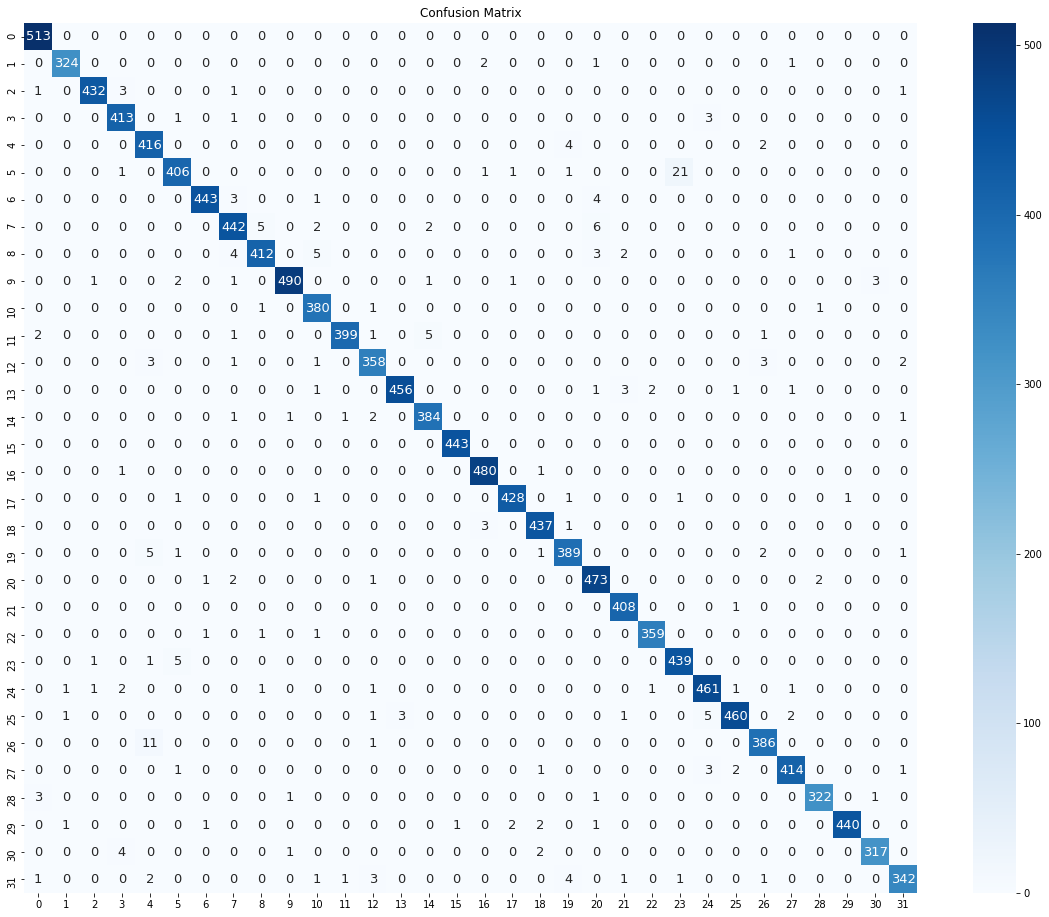

In [164]:
report(y_test.argmax(axis=1), y_pred)

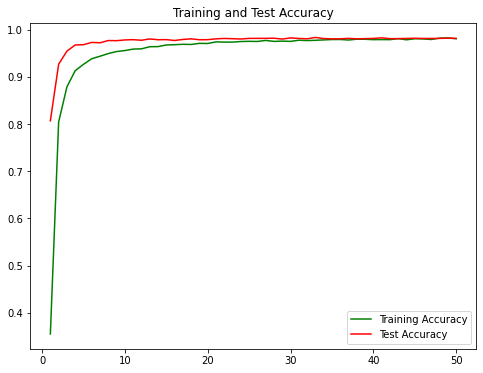

In [165]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, epochs+1), 
         accuracy, 
         color = 'green',
         label = "Training Accuracy")
plt.plot(np.arange(1, epochs+1), 
         val_accuracy, 
         color = 'red',
         label = "Test Accuracy")
plt.legend()
plt.title("Training and Test Accuracy")
plt.show()

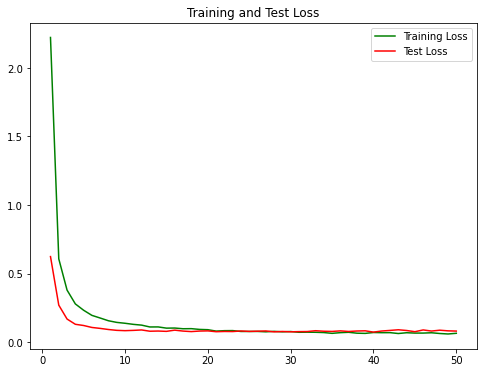

In [166]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, epochs+1), 
         loss, 
         color = 'green',
         label = "Training Loss")
plt.plot(np.arange(1, epochs+1), 
         val_loss, 
         color = 'red',
         label = "Test Loss")
plt.legend()
plt.title("Training and Test Loss")
plt.show()

### Saving the model

In [170]:
model.save('ArSLModelv2.h5')

In [168]:
import pickle

file = open("ArSLLabels.pkl", "wb")
pickle.dump(encoding, file)
file.close()

file = open("ArSLLabels.pkl", "rb")
output = pickle.load(file)
print(output)

{0: 'ain', 1: 'al', 2: 'aleff', 3: 'bb', 4: 'dal', 5: 'dha', 6: 'dhad', 7: 'fa', 8: 'gaaf', 9: 'ghain', 10: 'ha', 11: 'haa', 12: 'jeem', 13: 'kaaf', 14: 'khaa', 15: 'la', 16: 'laam', 17: 'meem', 18: 'nun', 19: 'ra', 20: 'saad', 21: 'seen', 22: 'sheen', 23: 'ta', 24: 'taa', 25: 'thaa', 26: 'thal', 27: 'toot', 28: 'waw', 29: 'ya', 30: 'yaa', 31: 'zay'}


In [169]:
'''
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
'''

'\n# serialize model to JSON\nmodel_json = model.to_json()\nwith open("model.json", "w") as json_file:\n    json_file.write(model_json)\n'